In [348]:
"""
Data Mining (Dr. Shakeri)
Project 3 (TA)
Group ID: 15
Group Members: Alireza Mohamadzadeh 9913024,
               Javad Fazli 9913019,
               Pouria Alimoradpor 9912035
"""
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization, Activation
from sklearn.metrics import f1_score, recall_score, precision_score, accuracy_score, classification_report, confusion_matrix
from tensorflow.keras.optimizers import Adam

In [349]:
!gdown 1Aid3-hjwlBb_PvLajKidoQK-pP9shuPu

Downloading...
From: https://drive.google.com/uc?id=1Aid3-hjwlBb_PvLajKidoQK-pP9shuPu
To: /content/breast cancer.csv
100% 125k/125k [00:00<00:00, 94.5MB/s]


**Read Dataset**

In [350]:
df = pd.read_csv("/content/breast cancer.csv")


In [351]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [352]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [353]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


**Pre-Process**

In [354]:
# Checking null values, if any
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [355]:
df=df.drop(df.columns[[31]],axis=1)
df.isnull().sum()

id                          0
diagnosis                   0
radius_mean                 0
texture_mean                0
perimeter_mean              0
area_mean                   0
smoothness_mean             0
compactness_mean            0
concavity_mean              0
concave points_mean         0
symmetry_mean               0
fractal_dimension_mean      0
radius_se                   0
texture_se                  0
perimeter_se                0
area_se                     0
smoothness_se               0
compactness_se              0
concavity_se                0
concave points_se           0
symmetry_se                 0
fractal_dimension_se        0
radius_worst                0
texture_worst               0
perimeter_worst             0
area_worst                  0
smoothness_worst            0
compactness_worst           0
concavity_worst             0
concave points_worst        0
symmetry_worst              0
Unnamed: 32               569
dtype: int64

In [356]:
df = df.drop('Unnamed: 32', axis=1)
df["diagnosis"] = df["diagnosis"].map({'M':1,'B':0})
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060
565,926682,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572
566,926954,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218
567,927241,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087


In [357]:
X=df.drop("diagnosis",axis=1)
y=df["diagnosis"]

**Data Visualization**

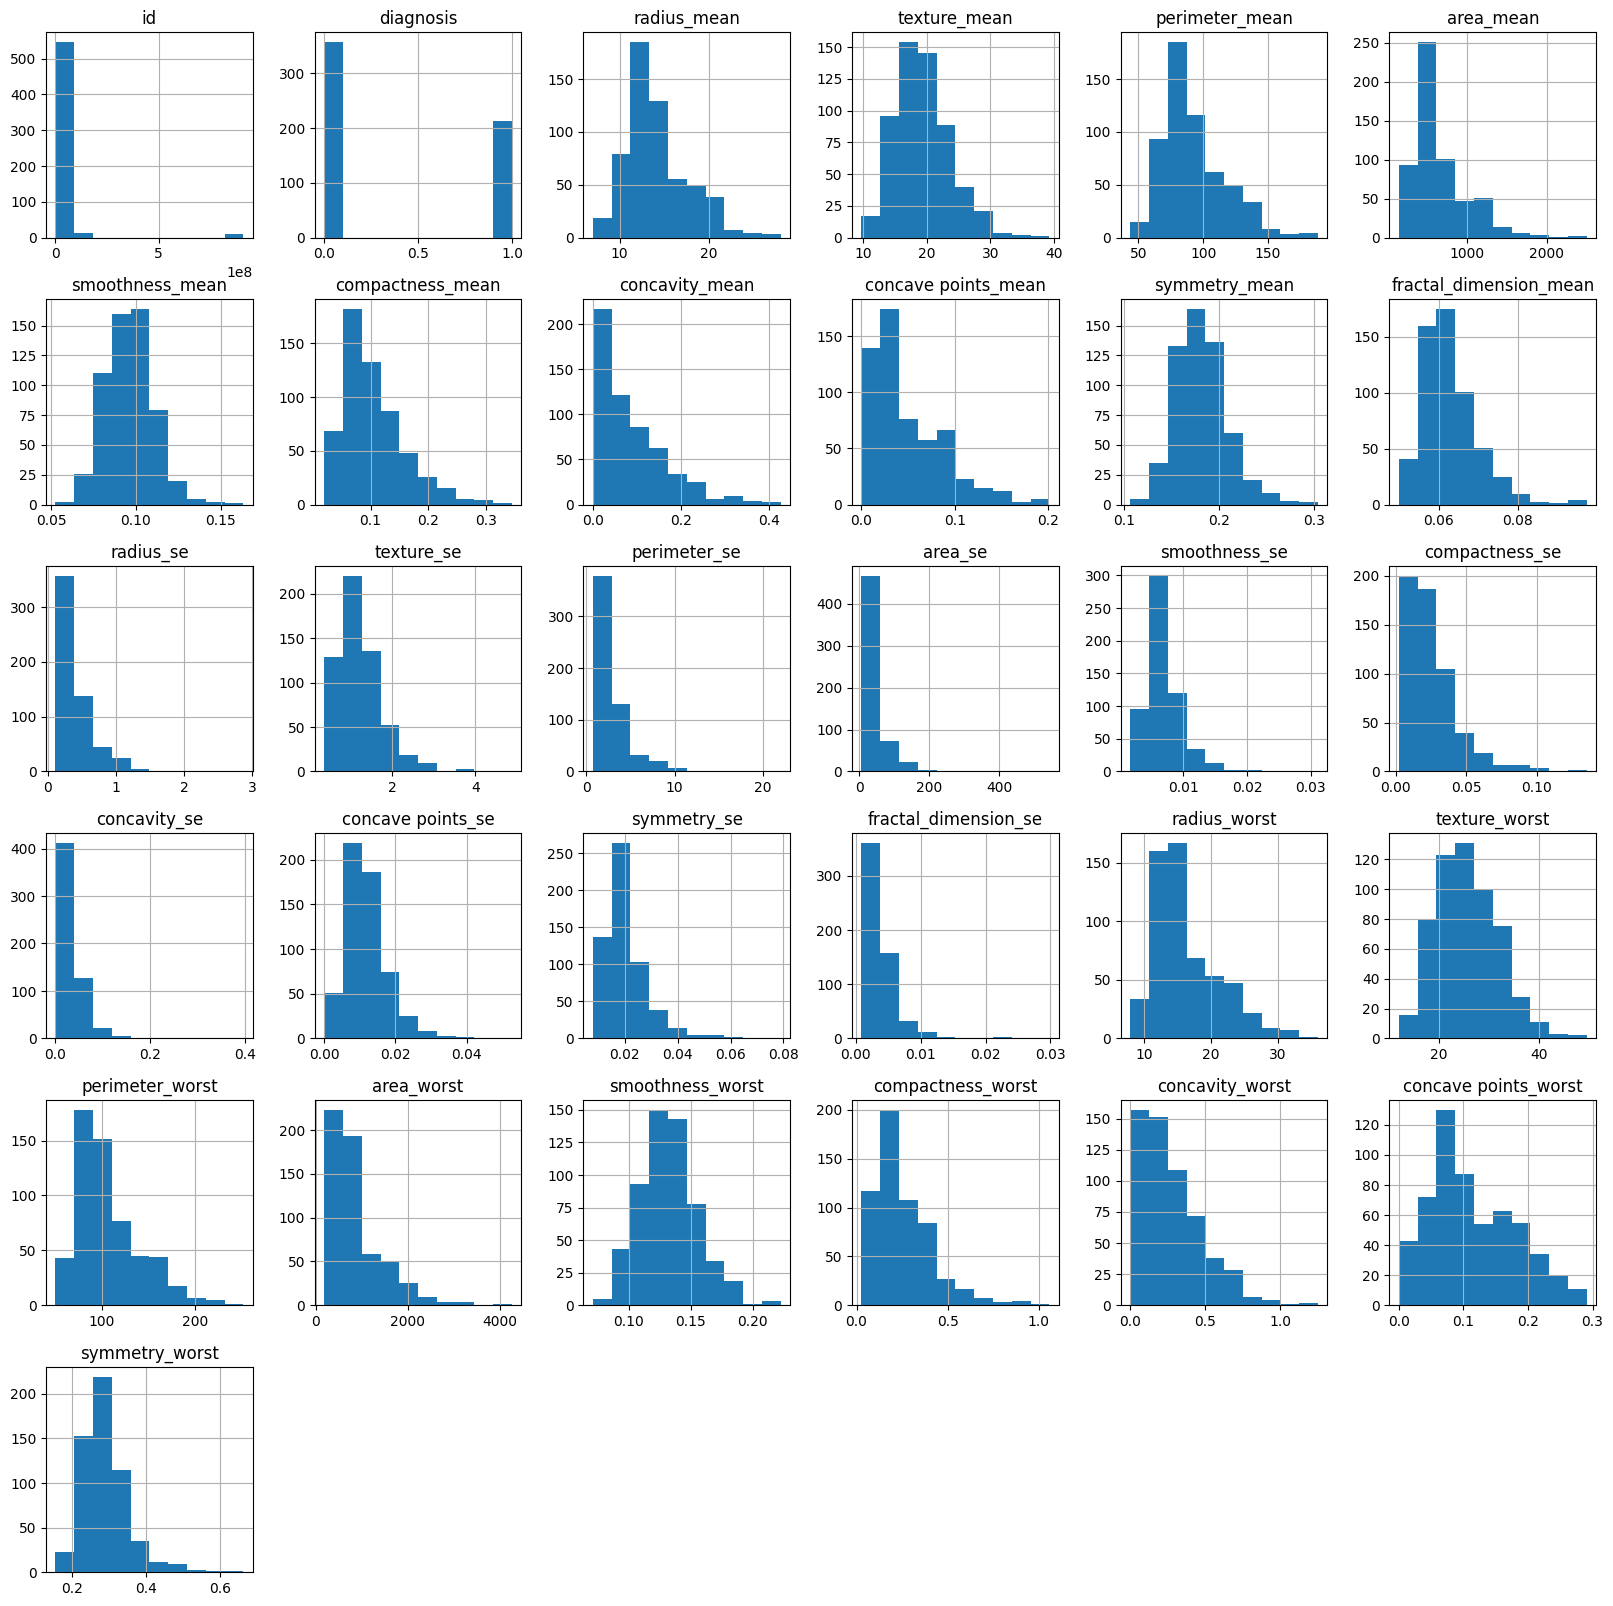

In [358]:
# Plot a histogram of the features
df.hist(figsize=(20,20))
plt.show()

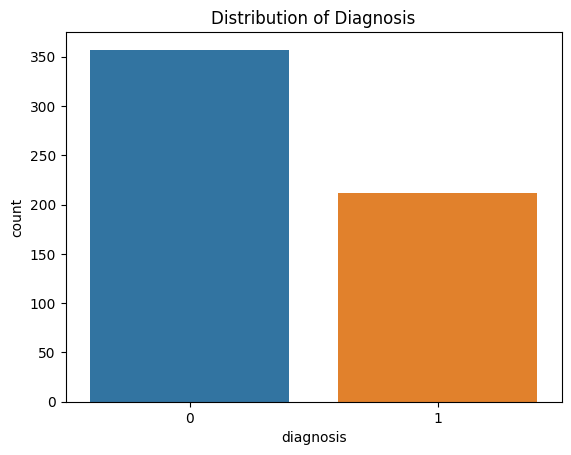

In [359]:
# Check the distribution of the target variable
sns.countplot(x='diagnosis', data=df)
plt.title('Distribution of Diagnosis')
plt.show()

In [360]:
# Scale the data
scaler = StandardScaler()
scaler.fit(df.drop('diagnosis', axis=1))
scaled_features = scaler.transform(df.drop('diagnosis', axis=1))
df_feat = pd.DataFrame(scaled_features, columns=df.columns[:-1])
df_feat.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst
0,-0.236405,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,...,0.907083,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622
1,-0.236403,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,...,-0.099444,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890
2,0.431741,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,...,0.293559,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255
3,0.432121,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,...,2.047511,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041
4,0.432201,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,...,0.499328,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353


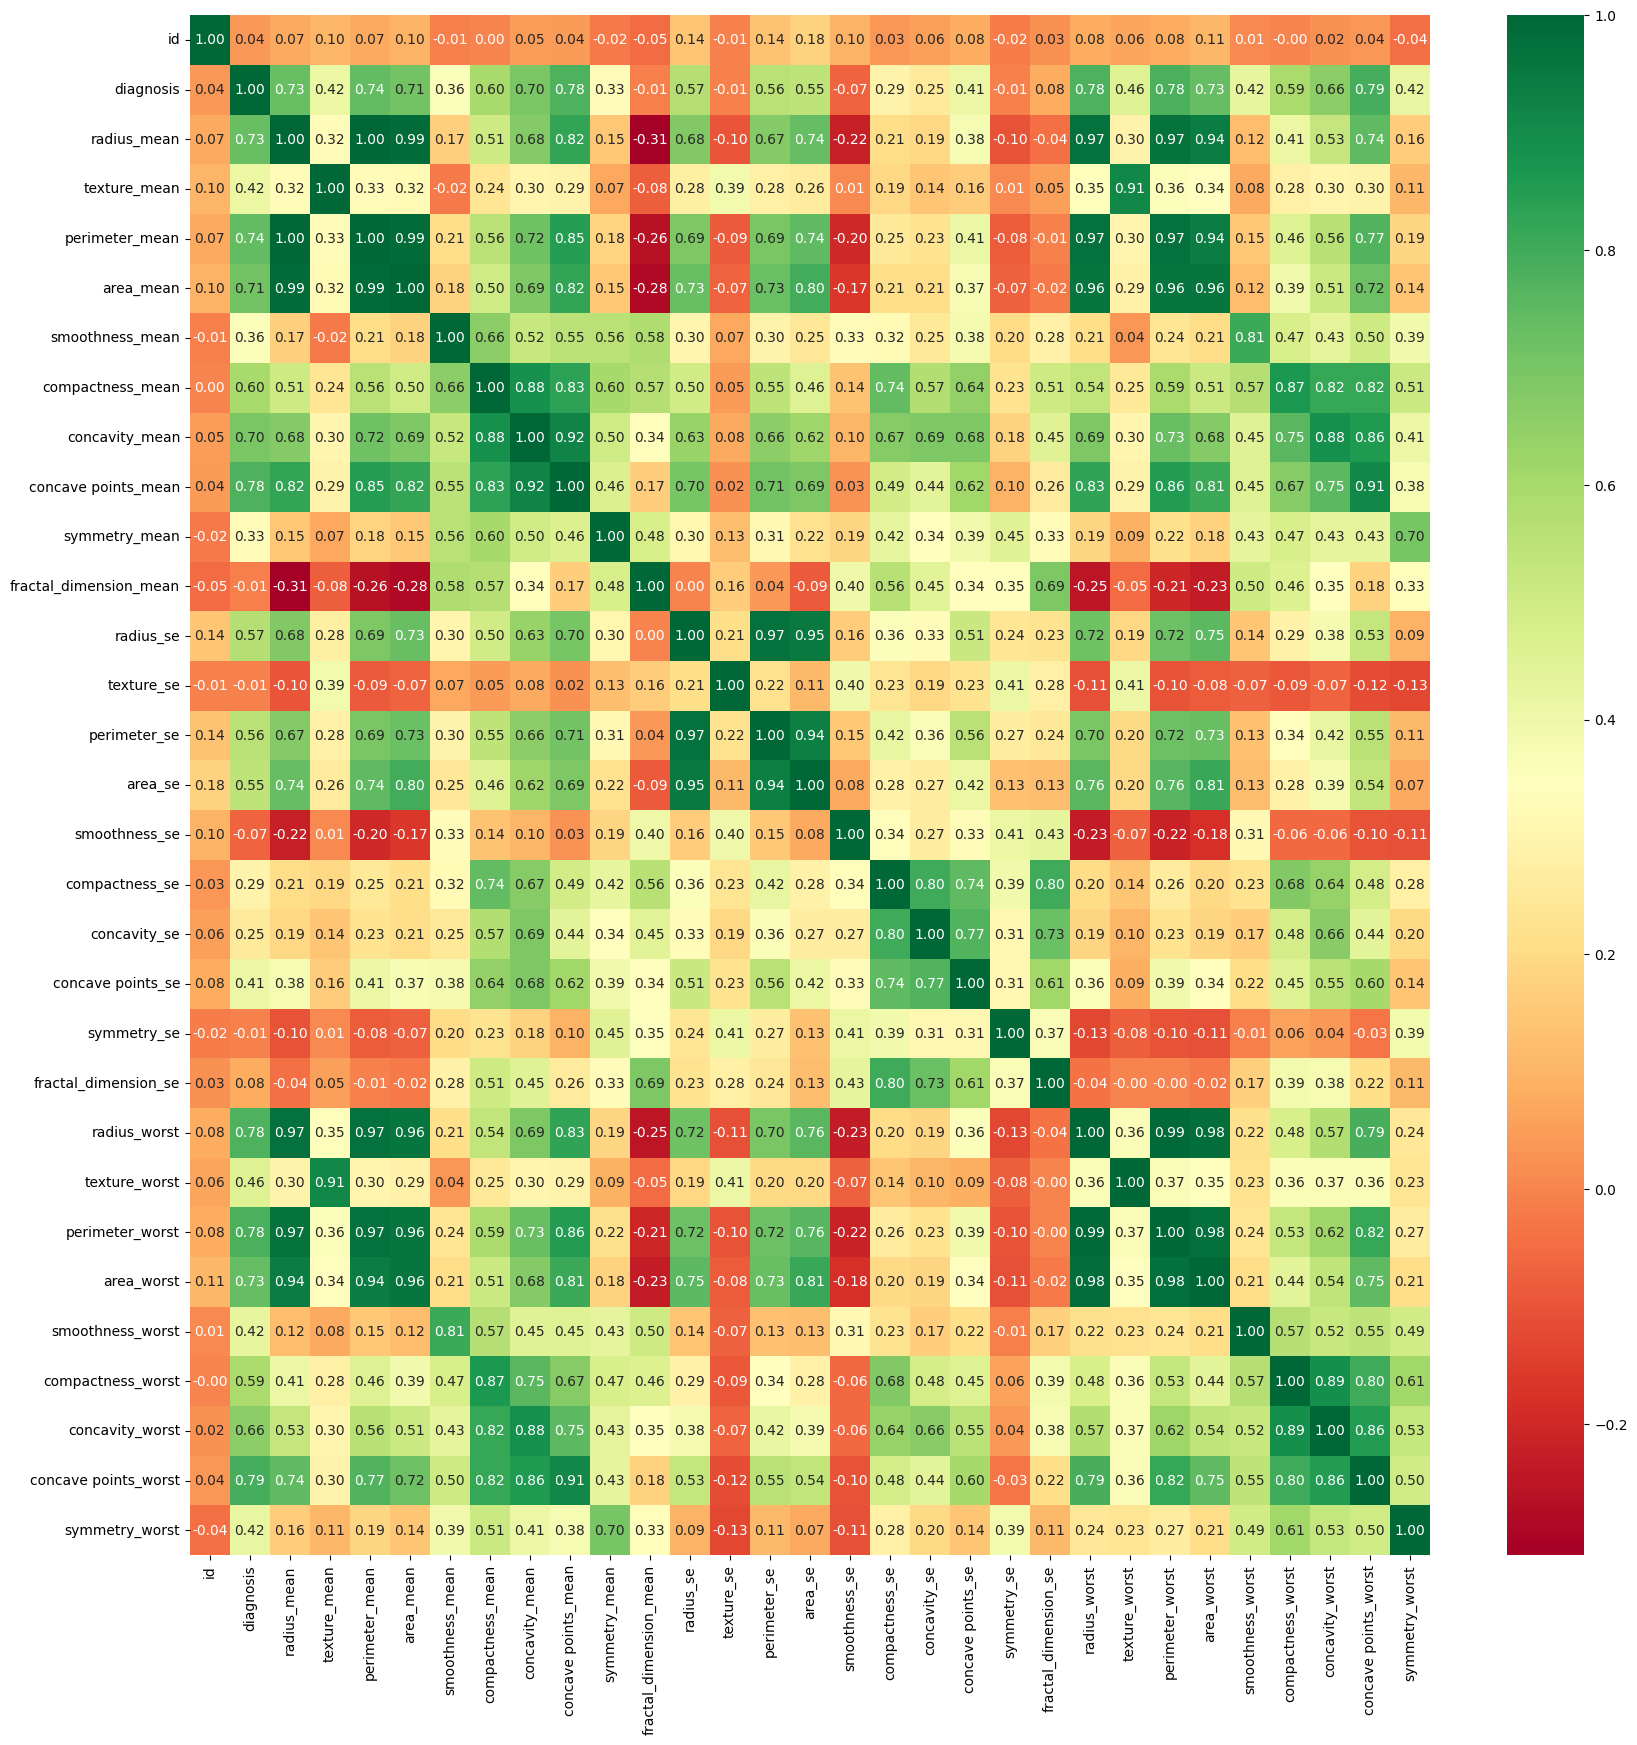

In [361]:
# Feature Selection by Correlation
corr = df.corr()
plt.figure(figsize=(20, 20))
sns.heatmap(corr, annot=True, cmap="RdYlGn",fmt='.2f')
plt.show()

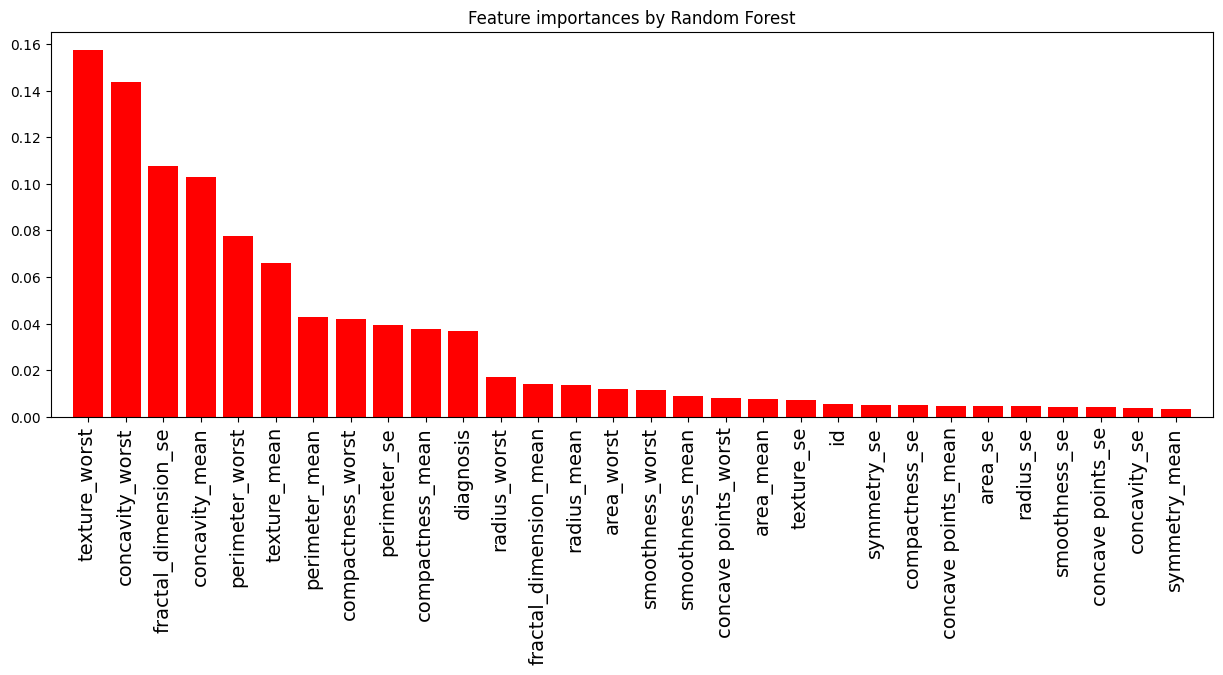

Index(['texture_worst', 'concavity_worst', 'fractal_dimension_se',
       'concavity_mean', 'perimeter_worst', 'texture_mean', 'perimeter_mean',
       'compactness_worst', 'perimeter_se', 'compactness_mean', 'diagnosis',
       'radius_worst', 'fractal_dimension_mean', 'radius_mean', 'area_worst',
       'smoothness_worst', 'smoothness_mean', 'concave points_worst',
       'area_mean', 'texture_se', 'id', 'symmetry_se', 'compactness_se',
       'concave points_mean', 'area_se', 'radius_se', 'smoothness_se',
       'concave points_se', 'concavity_se', 'symmetry_mean'],
      dtype='object')

In [362]:
# Feature Selection by Random Forest
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(df_feat, df['diagnosis'])
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(15, 5))
plt.title("Feature importances by Random Forest")
plt.bar(range(len(indices)), importances[indices], color="r", align="center")
plt.xticks(range(len(indices)), df_feat.columns[indices], rotation='vertical', fontsize=14)
plt.xlim([-1, len(indices)])
plt.show()
df_feat.columns[indices]

In [363]:
list_of_low_importance_feature=['smoothness_worst', 'smoothness_mean', 'concave points_worst','area_mean', 'texture_se', 'id',
                                'symmetry_se', 'compactness_se', 'concave points_mean', 'area_se', 'radius_se', 'smoothness_se',
                                'concave points_se', 'concavity_se', 'symmetry_mean']
for col in X.columns:
    if col in list_of_low_importance_feature:
        del X[col]
X.columns
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   radius_mean             569 non-null    float64
 1   texture_mean            569 non-null    float64
 2   perimeter_mean          569 non-null    float64
 3   compactness_mean        569 non-null    float64
 4   concavity_mean          569 non-null    float64
 5   fractal_dimension_mean  569 non-null    float64
 6   perimeter_se            569 non-null    float64
 7   fractal_dimension_se    569 non-null    float64
 8   radius_worst            569 non-null    float64
 9   texture_worst           569 non-null    float64
 10  perimeter_worst         569 non-null    float64
 11  area_worst              569 non-null    float64
 12  compactness_worst       569 non-null    float64
 13  concavity_worst         569 non-null    float64
 14  symmetry_worst          569 non-null    fl

In [364]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

**Build Model**

The input layer has 15 neurons, because we have 15 features after the feature extract, the middle layer has 8 neurons, and the final layer, because the output is binary, has one neuron with Sigmund activator, the activator of the middle layer and the input is the ReLU function.and the loss function is binary_crossentropy

In [365]:
def create_model(learning_rate):
  model = Sequential()
  model.add(Dense(15, activation='relu'))
  model.add(Dense(8, activation='relu'))
  model.add(Dense(1, activation='sigmoid'))
  opt = Adam(learning_rate=learning_rate)
  model.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer=opt)
  return model

Set learning rate = 0.001 & epochs = 10

In [366]:
# Define number of folds for cross-validation
from sklearn.model_selection import KFold
num_folds = 5
kfold = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Initialize lists to store metrics for each fold
test_loss_scores = []
test_acc_scores = []

# Loop through each fold and train the model
for fold, (train_idx, val_idx) in enumerate(kfold.split(X, y)):
    X_train, y_train = X.iloc[train_idx], y.iloc[train_idx]
    X_val, y_val = X.iloc[val_idx], y.iloc[val_idx]

    # Create and train the model for this fold
    model = create_model(learning_rate=0.001)
    history = model.fit(X_train, y_train, epochs=10, batch_size=128, verbose=0, validation_data=(X_val, y_val))

    # Evaluate the model on the test set for this fold
    test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
    print(f'Fold {fold+1}: Test loss: {test_loss:.4f}, Test accuracy: {test_acc:.4f}')

    # Append the test loss and accuracy scores for this fold to the lists
    test_loss_scores.append(test_loss)
    test_acc_scores.append(test_acc)

# Calculate and print the mean and standard deviation of the test loss and accuracy scores across all folds
print(f'Mean test loss: {np.mean(test_loss_scores):.4f} +/- {np.std(test_loss_scores):.4f}')
print(f'Mean test accuracy: {np.mean(test_acc_scores):.4f} +/- {np.std(test_acc_scores):.4f}')

Fold 1: Test loss: 1.3161, Test accuracy: 0.4474
Fold 2: Test loss: 0.6964, Test accuracy: 0.3246
Fold 3: Test loss: 0.1966, Test accuracy: 0.9298
Fold 4: Test loss: 92.4739, Test accuracy: 0.6842
Fold 5: Test loss: 0.3413, Test accuracy: 0.9123
Mean test loss: 19.0049 +/- 36.7365
Mean test accuracy: 0.6596 +/- 0.2428


Set learning rate = 0.001 & epochs = 20

In [367]:
# Define number of folds for cross-validation
from sklearn.model_selection import KFold
num_folds = 5
kfold = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Initialize lists to store metrics for each fold
test_loss_scores = []
test_acc_scores = []

# Loop through each fold and train the model
for fold, (train_idx, val_idx) in enumerate(kfold.split(X, y)):
    X_train, y_train = X.iloc[train_idx], y.iloc[train_idx]
    X_val, y_val = X.iloc[val_idx], y.iloc[val_idx]

    # Create and train the model for this fold
    model = create_model(learning_rate=0.001)
    history = model.fit(X_train, y_train, epochs=20, batch_size=128, verbose=0, validation_data=(X_val, y_val),validation_split=0.2)

    # Evaluate the model on the test set for this fold
    test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
    print(f'Fold {fold+1}: Test loss: {test_loss:.4f}, Test accuracy: {test_acc:.4f}')

    # Append the test loss and accuracy scores for this fold to the lists
    test_loss_scores.append(test_loss)
    test_acc_scores.append(test_acc)

# Calculate and print the mean and standard deviation of the test loss and accuracy scores across all folds
print(f'Mean test loss: {np.mean(test_loss_scores):.4f} +/- {np.std(test_loss_scores):.4f}')
print(f'Mean test accuracy: {np.mean(test_acc_scores):.4f} +/- {np.std(test_acc_scores):.4f}')

Fold 1: Test loss: 0.8449, Test accuracy: 0.9035
Fold 2: Test loss: 9.3517, Test accuracy: 0.6842
Fold 3: Test loss: 1.2644, Test accuracy: 0.2193
Fold 4: Test loss: 11.2057, Test accuracy: 0.0965
Fold 5: Test loss: 1.2681, Test accuracy: 0.5877
Mean test loss: 4.7869 +/- 4.5248
Mean test accuracy: 0.4982 +/- 0.2987


Set learning rate 0.01 & epoch = 10

In [368]:
# Define number of folds for cross-validation
from sklearn.model_selection import KFold
num_folds = 5
kfold = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Initialize lists to store metrics for each fold
test_loss_scores = []
test_acc_scores = []

# Loop through each fold and train the model
for fold, (train_idx, val_idx) in enumerate(kfold.split(X, y)):
    X_train, y_train = X.iloc[train_idx], y.iloc[train_idx]
    X_val, y_val = X.iloc[val_idx], y.iloc[val_idx]

    # Create and train the model for this fold
    model = create_model(learning_rate=0.01)
    history = model.fit(X_train, y_train, epochs=10, batch_size=128, verbose=0, validation_data=(X_val, y_val),validation_split=0.2)

    # Evaluate the model on the test set for this fold
    test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
    print(f'Fold {fold+1}: Test loss: {test_loss:.4f}, Test accuracy: {test_acc:.4f}')

    # Append the test loss and accuracy scores for this fold to the lists
    test_loss_scores.append(test_loss)
    test_acc_scores.append(test_acc)

# Calculate and print the mean and standard deviation of the test loss and accuracy scores across all folds
print(f'Mean test loss: {np.mean(test_loss_scores):.4f} +/- {np.std(test_loss_scores):.4f}')
print(f'Mean test accuracy: {np.mean(test_acc_scores):.4f} +/- {np.std(test_acc_scores):.4f}')

Fold 1: Test loss: 0.4885, Test accuracy: 0.7632
Fold 2: Test loss: 0.3506, Test accuracy: 0.8772
Fold 3: Test loss: 0.4826, Test accuracy: 0.7719
Fold 4: Test loss: 0.4183, Test accuracy: 0.7193
Fold 5: Test loss: 0.3141, Test accuracy: 0.9123
Mean test loss: 0.4108 +/- 0.0696
Mean test accuracy: 0.8088 +/- 0.0733


learning rate = 0.001 & epoch = 20

In [369]:
# Define number of folds for cross-validation
from sklearn.model_selection import KFold
num_folds = 5
kfold = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Initialize lists to store metrics for each fold
test_loss_scores = []
test_acc_scores = []

# Loop through each fold and train the model
for fold, (train_idx, val_idx) in enumerate(kfold.split(X, y)):
    X_train, y_train = X.iloc[train_idx], y.iloc[train_idx]
    X_val, y_val = X.iloc[val_idx], y.iloc[val_idx]

    # Create and train the model for this fold
    model = create_model(learning_rate=0.001)
    history = model.fit(X_train, y_train, epochs=20, batch_size=128, verbose=0, validation_data=(X_val, y_val),validation_split=0.2)

    # Evaluate the model on the test set for this fold
    test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
    print(f'Fold {fold+1}: Test loss: {test_loss:.4f}, Test accuracy: {test_acc:.4f}')

    # Append the test loss and accuracy scores for this fold to the lists
    test_loss_scores.append(test_loss)
    test_acc_scores.append(test_acc)

# Calculate and print the mean and standard deviation of the test loss and accuracy scores across all folds
print(f'Mean test loss: {np.mean(test_loss_scores):.4f} +/- {np.std(test_loss_scores):.4f}')
print(f'Mean test accuracy: {np.mean(test_acc_scores):.4f} +/- {np.std(test_acc_scores):.4f}')

Fold 1: Test loss: 2.8973, Test accuracy: 0.2895
Fold 2: Test loss: 0.6335, Test accuracy: 0.8509
Fold 3: Test loss: 0.1642, Test accuracy: 0.9474
Fold 4: Test loss: 0.3271, Test accuracy: 0.9035
Fold 5: Test loss: 0.2146, Test accuracy: 0.9211
Mean test loss: 0.8473 +/- 1.0379
Mean test accuracy: 0.7825 +/- 0.2485


Best model accuracy :Set learning rate = 0.01 & epoch = 20

In [370]:
# Define number of folds for cross-validation
from sklearn.model_selection import KFold
num_folds = 5
kfold = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Initialize lists to store metrics for each fold
test_loss_scores = []
test_acc_scores = []

# Loop through each fold and train the model
for fold, (train_idx, val_idx) in enumerate(kfold.split(X, y)):
    X_train, y_train = X.iloc[train_idx], y.iloc[train_idx]
    X_val, y_val = X.iloc[val_idx], y.iloc[val_idx]

    # Create and train the model for this fold
    model = create_model(learning_rate=0.01)
    history = model.fit(X_train, y_train, epochs=20, batch_size=128, verbose=0, validation_data=(X_val, y_val),validation_split=0.2)

    # Evaluate the model on the test set for this fold
    test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
    print(f'Fold {fold+1}: Test loss: {test_loss:.4f}, Test accuracy: {test_acc:.4f}')

    # Append the test loss and accuracy scores for this fold to the lists
    test_loss_scores.append(test_loss)
    test_acc_scores.append(test_acc)

# Calculate and print the mean and standard deviation of the test loss and accuracy scores across all folds
print(f'Mean test loss: {np.mean(test_loss_scores):.4f} +/- {np.std(test_loss_scores):.4f}')
print(f'Mean test accuracy: {np.mean(test_acc_scores):.4f} +/- {np.std(test_acc_scores):.4f}')

Fold 1: Test loss: 0.6555, Test accuracy: 0.6842
Fold 2: Test loss: 0.3987, Test accuracy: 0.9298
Fold 3: Test loss: 0.2740, Test accuracy: 0.9123
Fold 4: Test loss: 0.1786, Test accuracy: 0.9298
Fold 5: Test loss: 0.2145, Test accuracy: 0.9386
Mean test loss: 0.3442 +/- 0.1727
Mean test accuracy: 0.8789 +/- 0.0977


**Results**

4/4 [==============================] - 0s 3ms/step


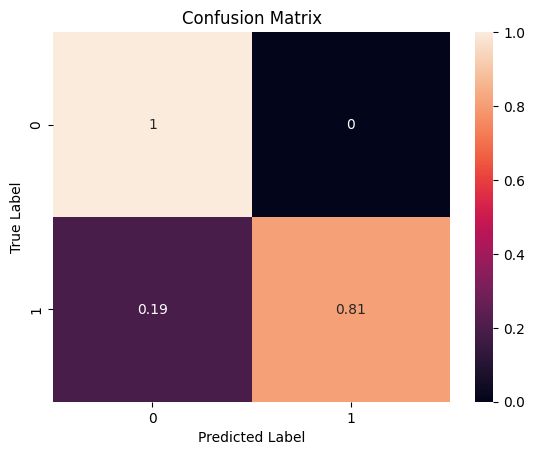

Accuracy: 0.9385964912280702
Precision: 1.0
Recall: 0.8055555555555556
F1 Score: 0.8923076923076924
Classification Report: 
               precision    recall  f1-score   support

           0       0.92      1.00      0.96        78
           1       1.00      0.81      0.89        36

    accuracy                           0.94       114
   macro avg       0.96      0.90      0.92       114
weighted avg       0.94      0.94      0.94       114



In [371]:
# f1-score, confusion matrix, precision, recall
from sklearn.metrics import classification_report, confusion_matrix
y_predict=model.predict(X_test)
y_predict = np.round(y_predict).tolist()
# Confusion matrix
cmt = confusion_matrix(y_test, y_predict)
cmn = cmt.astype('float') / cmt.sum(axis=1)[:, np.newaxis]

sns.heatmap(cmn, annot=True)

plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Compute and print metrics
print("Accuracy:", accuracy_score(y_test, y_predict))
print("Precision:", precision_score(y_test, y_predict, pos_label=1))
print("Recall:", recall_score(y_test, y_predict, pos_label=1))
print("F1 Score:", f1_score(y_test, y_predict, pos_label=1))

# Classification Report
print("Classification Report: \n", classification_report(y_test, y_predict))


In [372]:
model.summary()

Model: "sequential_256"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_768 (Dense)           (None, 15)                240       
                                                                 
 dense_769 (Dense)           (None, 8)                 128       
                                                                 
 dense_770 (Dense)           (None, 1)                 9         
                                                                 
Total params: 377
Trainable params: 377
Non-trainable params: 0
_________________________________________________________________
